In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

## INPUT Dataset
CMD Sangatta Data Historical from Jan 2023 to Feb 2025

In [2]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  CMDData_Pandas05032025A.csv


,Month,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,Jan-23,17651848.71,1644493.176,4.098372,14.959325,34508759
1,Feb-23,15151650.49,1476316.144,4.364071,16.110931,33321140
2,Mar-23,19017841.88,2134989.924,4.434172,15.505810,40815447
3,Apr-23,18199985.98,2179526.092,4.419683,14.694396,35914360
4,May-23,18731832.87,2239618.683,4.513426,15.427396,38302147
5,Jun-23,18710578.57,2333943.272,4.315955,14.888089,38897667
6,Jul-23,21479823.81,2464073.800,4.349031,13.781183,39621919
7,Aug-23,24151259.39,2806058.912,4.222706,13.074114,41783822
8,Sep-23,21043264.92,2271027.387,4.099121,14.208968,34501584
9,Oct-23,22125962.04,2285036.818,3.519936,14.354569,34081456


## Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library).

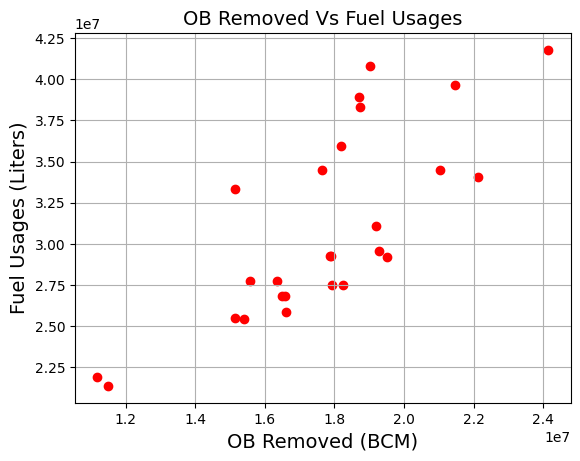

In [3]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

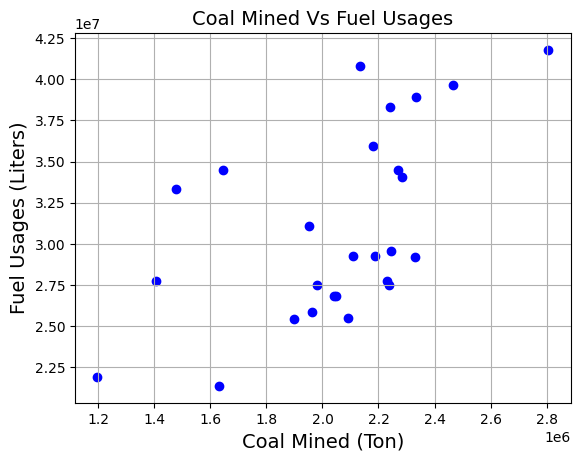

In [4]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

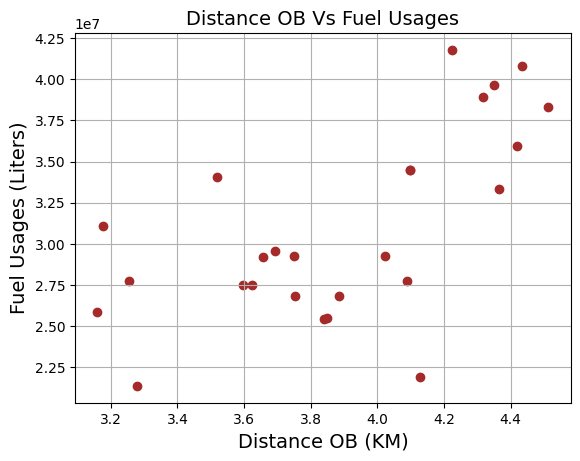

In [5]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

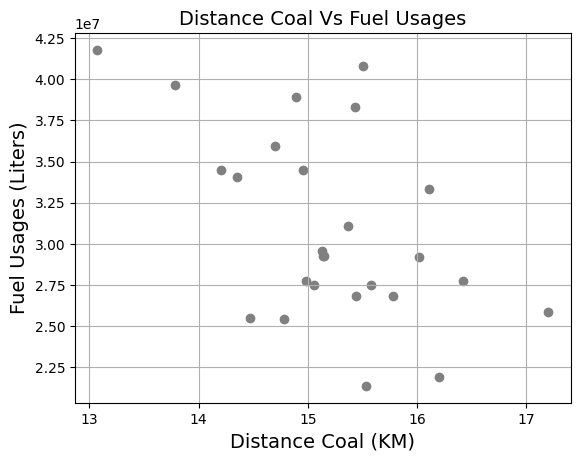

In [6]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

## From Linearity test 
We found that OB Removed, Coal Mined and OB Distance have linier relantionship with Fuel Usages

## Checking Outliers
Check Correlation before removing Outliers

In [7]:
dataset = dataset.drop(['Month'], axis=1)

In [8]:
correlations = dataset.corr()
correlations['Fuel'].round(2)

OB (Bcm)              0.76
Coal (Ton)            0.57
Distance OB (KM)      0.64
Distance Coal (KM)   -0.53
Fuel                  1.00
Name: Fuel, dtype: float64

## From Corelation above 
We found that OB, Coal and OB Distance have corelation to Fuel, which have corelation point >= 0.5

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns

## Checking Outliers

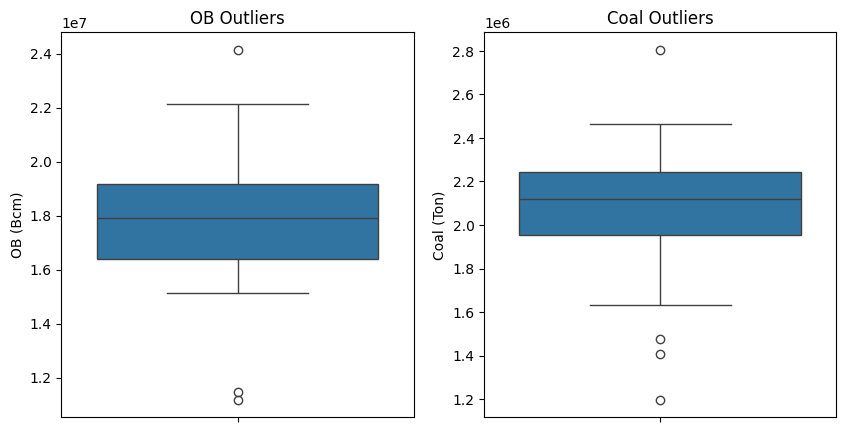

In [10]:
# Create box plots for each feature
plt.figure(figsize=(10, 5))

# OB Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['OB (Bcm)'])
plt.title("OB Outliers")

# Coal Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['Coal (Ton)'])
plt.title("Coal Outliers")

plt.show()

In [11]:
# Compute IQR
Q1 = dataset[['OB (Bcm)', 'Coal (Ton)']].quantile(0.25)
Q3 = dataset[['OB (Bcm)', 'Coal (Ton)']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((dataset[['OB (Bcm)', 'Coal (Ton)']] < lower_bound) | (dataset[['OB (Bcm)', 'Coal (Ton)']] > upper_bound))

# Get row indices of outliers
outlier_indices = dataset[outliers.any(axis=1)].index
outlier_masks = dataset[outliers.any(axis=1)]
print("Outlier indices:", outlier_indices)

outlier_rows = dataset.loc[outlier_indices]
print(outlier_rows)

Outlier indices: Index([1, 7, 11, 23, 24], dtype='int64')
       OB (Bcm)   Coal (Ton)  Distance OB (KM)  Distance Coal (KM)      Fuel
1   15151650.49  1476316.144          4.364071           16.110931  33321140
7   24151259.39  2806058.912          4.222706           13.074114  41783822
11  15575126.03  1406939.275          3.255220           16.422189  27769341
23  11188003.51  1197227.368          4.127576           16.200381  21882734
24  11483000.00  1631000.000          3.280000           15.530000  21362236


## Clean Dataset without Outliers

In [12]:
dataset = dataset.drop(index=outlier_indices)  # Keep only rows without outliers
dataset

,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,17651848.71,1644493.176,4.098372,14.959325,34508759
2,19017841.88,2134989.924,4.434172,15.505810,40815447
3,18199985.98,2179526.092,4.419683,14.694396,35914360
4,18731832.87,2239618.683,4.513426,15.427396,38302147
5,18710578.57,2333943.272,4.315955,14.888089,38897667
6,21479823.81,2464073.800,4.349031,13.781183,39621919
8,21043264.92,2271027.387,4.099121,14.208968,34501584
9,22125962.04,2285036.818,3.519936,14.354569,34081456
10,19206166.45,1952814.895,3.176831,15.365996,31062464
12,19507006.97,2330841.132,3.656755,16.019240,29205881


In [13]:
correlations = dataset.corr()
correlations['Fuel'].round(3)

OB (Bcm)              0.654
Coal (Ton)            0.382
Distance OB (KM)      0.691
Distance Coal (KM)   -0.381
Fuel                  1.000
Name: Fuel, dtype: float64

## Features & Target
Features (x) : Independent Variables = OB & OB Distance
Target (y) : Dependent Variable = Fuel

In [14]:
x = dataset[['OB (Bcm)', 'Distance OB (KM)']]
y = dataset['Fuel']
 
# Split dataset (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
# ==============================
# Linear Regression (sklearn)
# ==============================
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predictions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [17]:
# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-Validation (5-fold)
cv_scores = cross_val_score(regr, X_train, y_train, cv=3, scoring='r2')

# Print Results
print("\n Model Performance Metrics:")
print(f"Train MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
print(f"Train MAE: {train_mae:.3f} | Test MAE: {test_mae:.3f}")
print(f"Train R² Score: {train_r2:.3f} | Test R² Score: {test_r2:.3f}")

print("\n Cross-Validation Results:")
print(f"R² Scores for each fold: {cv_scores.round(3)}")
print(f"Mean R² Score: {cv_scores.mean():.3f} | Std Dev: {cv_scores.std():.3f}")


 Model Performance Metrics:
Train MSE: 2925011976102.622 | Test MSE: 8433640807223.885
Train MAE: 1345090.888 | Test MAE: 2474262.295
Train R² Score: 0.868 | Test R² Score: 0.640

 Cross-Validation Results:
R² Scores for each fold: [0.937 0.495 0.716]
Mean R² Score: 0.716 | Std Dev: 0.180


In [23]:
# ==============================
# Linear Regression (statsmodels)
# ==============================

regr = linear_model.LinearRegression()
regr.fit(x, y)
print("Final Model Intercept:", regr.intercept_)
print("Final Model Coefficients:", regr.coef_)

X_const = sm.add_constant(x)  # Add constant for intercept
model = sm.OLS(y, X_const).fit()
print("\n📌 Statsmodels Regression Summary:")
print(model.summary())

Final Model Intercept: -29679747.36037337
Final Model Coefficients: [1.59336634e+00 8.19003401e+06]

📌 Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     38.98
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.88e-07
Time:                        21:58:11   Log-Likelihood:                -335.89
No. Observations:                  21   AIC:                             677.8
Df Residuals:                      18   BIC:                             680.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025   

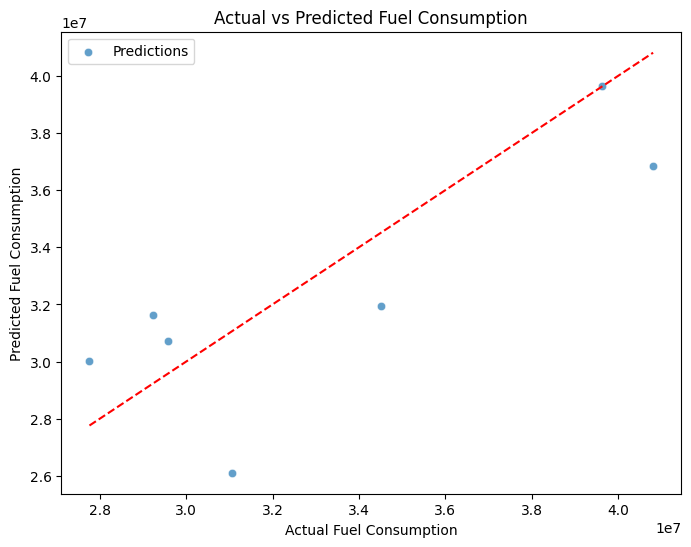

In [19]:
# ==============================
# Plot: Actual vs Predicted
# ==============================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs Predicted Fuel Consumption")
plt.legend()
plt.show()